## Excercise - 1 - Linear regression with one variable

In [1]:
%matplotlib inline
# %matplotlib notebook
import os;
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

# For 3d plot
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# very limited information when exception is caught
%xmode Plain
# %pdb on or %ipdb on # enable debugger when exception occurred

Exception reporting mode: Plain


### Plotting the data

In [22]:
path = os.getcwd() + '/data/ex1data1.txt';
data = pd.read_csv(path, header=None, names=['Population', 'Profit']);
data.head(n=5) # List first 5 rows from the dataset

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe() # describe the dataset properties

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


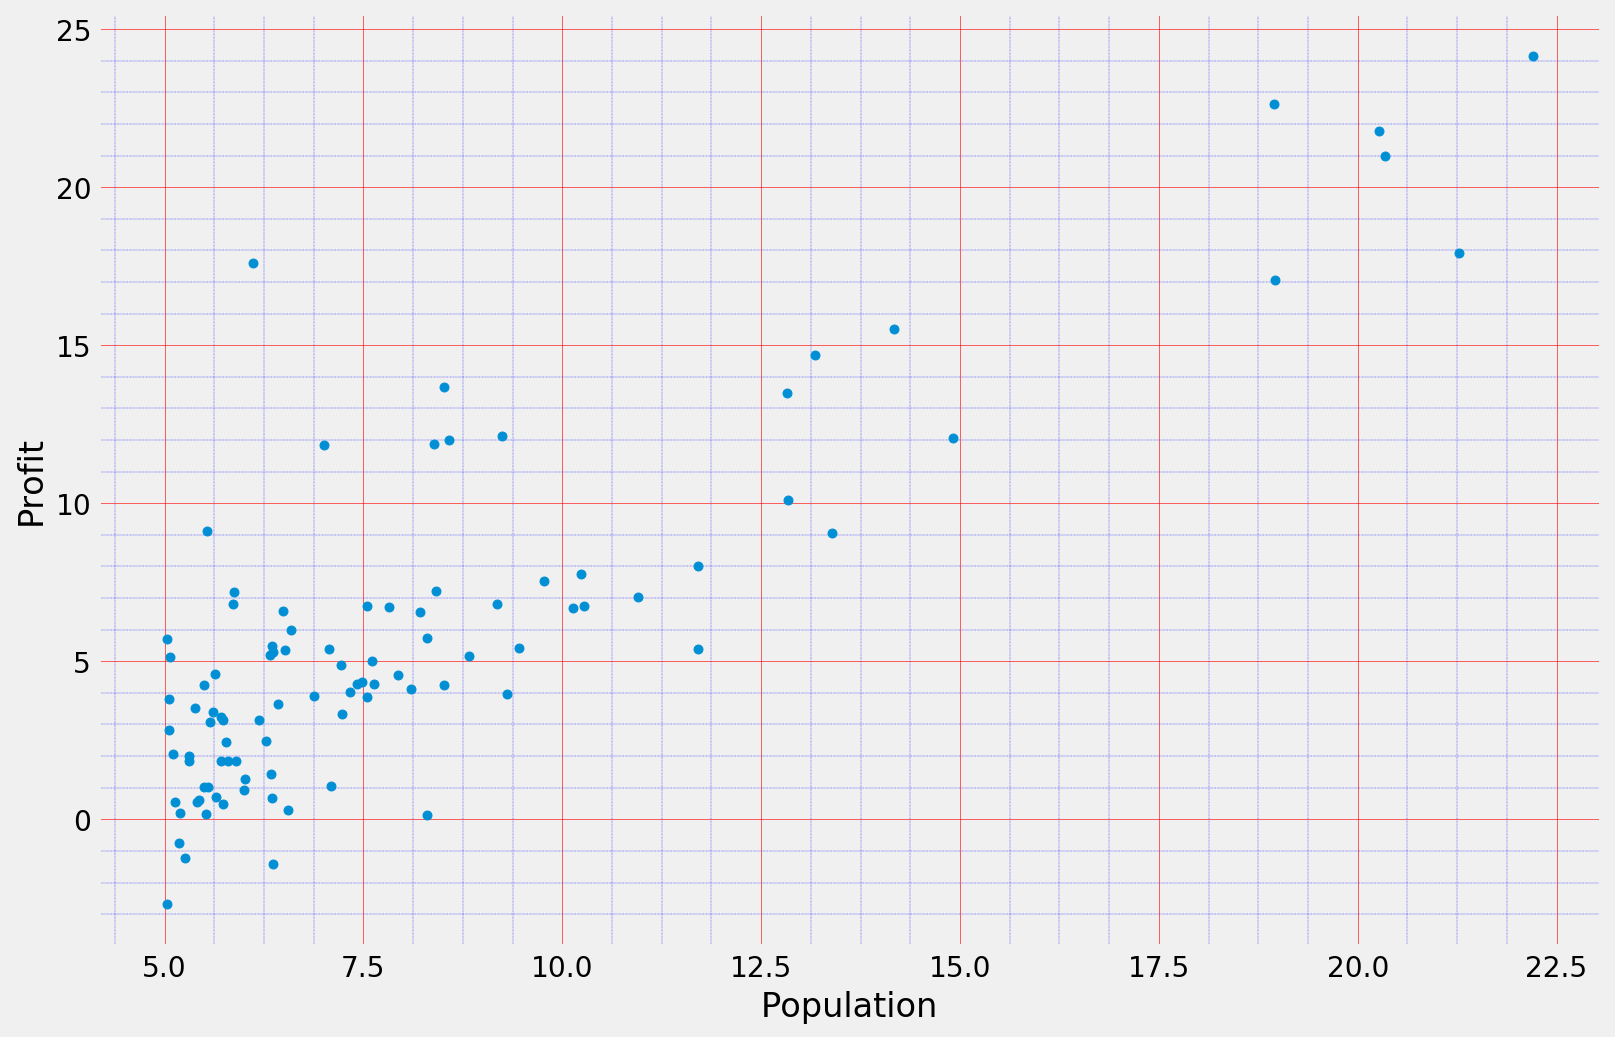

In [23]:
ax = data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
# ax.xaxis.grid(True, linestyle='-', linewidth=0.25)
# ax.yaxis.grid(True, linestyle='-', linewidth=0.25)
# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html
ls = (0, (3, 1, 1, 1, 1, 1))

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
# Turn off the display of all ticks.
ax.tick_params(which='both') # turn off bottom ticks

### Gradient Descent

In [24]:
data.insert(0, 'Ones', 1)

In [9]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
cols = data.shape[1]; # read only no. of columns
X = data.iloc[:,0:cols-1];
y = data.iloc[:, cols-1:cols];

In [32]:
def computeCost(X, y, theta):
    m = len(X);
    h = X * theta.T; # (4 X 2) * (2 X 1)
    squ_Err = np.power((h - y), 2);
    sumSq_Err = np.sum(squ_Err);
    J = (1/(2 * m)) * sumSq_Err;
    return J;    

In [9]:
# TEST CASE for computeCost function
# computeCost( [1 2; 1 3; 1 4; 1 5], [7;6;5;4], [0.1;0.2] )
# ans = 11.9450
_X = np.matrix([[1, 2],[1, 3], [1, 4], [1, 5]]);
print('X = ', _X.shape);
_y = np.matrix([7, 6, 5, 4]).T;
print('y = ', _y.shape);
_theta = np.matrix([0.1, 0.2]);
print('theta = ', _theta.shape);

J = computeCost(_X, _y, _theta);
J
# computeCost( [1 2 3; 1 3 4; 1 4 5; 1 5 6], [7;6;5;4], [0.1;0.2;0.3])
# ans = 7.0175


X =  (4, 2)
y =  (4, 1)
theta =  (1, 2)


11.945

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [11]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [12]:
J = computeCost(X, y, theta);
J

32.072733877455676

In [33]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history = np.zeros(shape=(num_iters, 1))
    tmpTheta = np.matrix(np.zeros(shape=theta.shape))
    parameters = int(theta.ravel().shape[1])
    theta_history = [] #Used to visualize the minimization path later on
    for i in range(num_iters):
        # print('%0.4f %0.4f \n' % (theta[0, 0], theta[0, 1]))
        theta0 = theta[0, 0]
        theta1 = theta[0, 1]
        theta_history.append(list([theta0, theta1]))
        hs = (X * theta.T) - y
        for j in range(parameters):
            sumPred = (alpha/m) * (np.sum(np.multiply(hs, X[:, j])))
            tmpTheta[0, j] = theta[0, j] - sumPred
        theta = tmpTheta
        J_history[i] = computeCost(X, y, theta)    
    return theta, theta_history, J_history

In [14]:
theta, theta_hist, J_hist = gradientDescent(np.matrix([[1, 5], [1, 2], [1, 4], [1, 5]]),
                                 np.matrix([1, 6, 4, 2]).T,
                                 np.matrix([0, 0]), 0.01, 10);
theta, theta_hist[0], theta_hist[1], theta_hist[2], J_hist[0], J_hist[9]

(matrix([[0.1923254 , 0.49849414]]),
 [0, 0],
 [0.0325, 0.1075],
 [0.060375, 0.1948875],
 array([5.97937031]),
 array([3.71746088]))

In [15]:
theta, theta_history, J_hist = gradientDescent(np.matrix([[1, 5], [1, 2]]),
                                 np.matrix([1, 6]).T,
                                 np.matrix([.5, .5]), 0.1, 10);
theta, theta_history[7], J_hist[0], J_hist[9]

(matrix([[1.70986322, 0.19229354]]),
 [1.3645932003906251, 0.27630068203125],
 array([5.8853125]),
 array([4.51166638]))

In [16]:
iterations = 1500;
alpha = 0.01;
g, theta_hist, J_hist = gradientDescent(X, y, theta, alpha, iterations)
len(theta_hist), len(J_hist)

(1500, 1500)

In [17]:
J = computeCost(X, y, g);
J

4.489928437790085

<IPython.core.display.Javascript object>


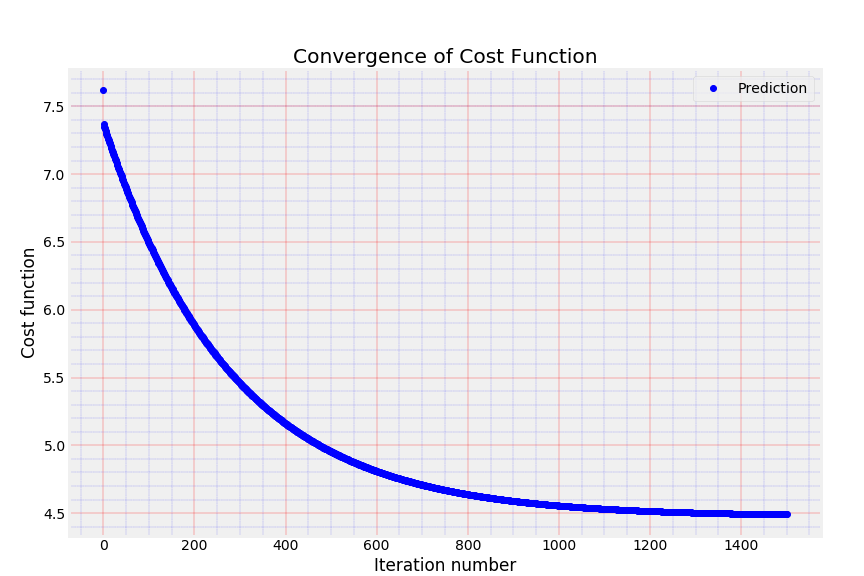

In [18]:
x = np.linspace(0, len(J_hist), len(J_hist))
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, J_hist, 'bo', label='Prediction')
ax.legend(loc=1)
ax.set_xlabel('Iteration number')
ax.set_ylabel('Cost function')
ax.set_title('Convergence of Cost Function')
ax.set_axisbelow(True)
ax.minorticks_on()
ls = (0, (3, 1, 1, 1, 1, 1))
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
ax.tick_params(which='both')

<IPython.core.display.Javascript object>


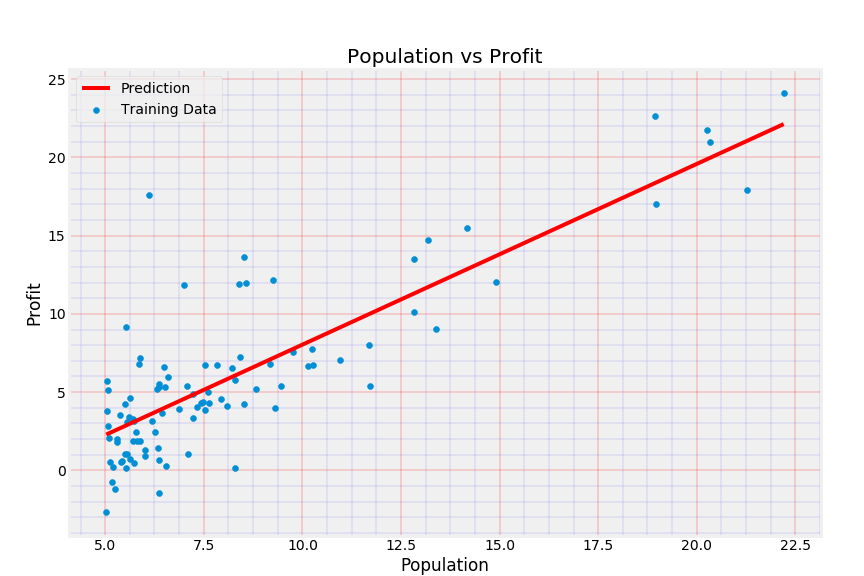

In [19]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + g[0, 1] * x;

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Population vs Profit')
ax.set_axisbelow(True)
ax.minorticks_on()
ls = (0, (3, 1, 1, 1, 1, 1))
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
ax.tick_params(which='both')

#### Visualizing _J($\theta$)_

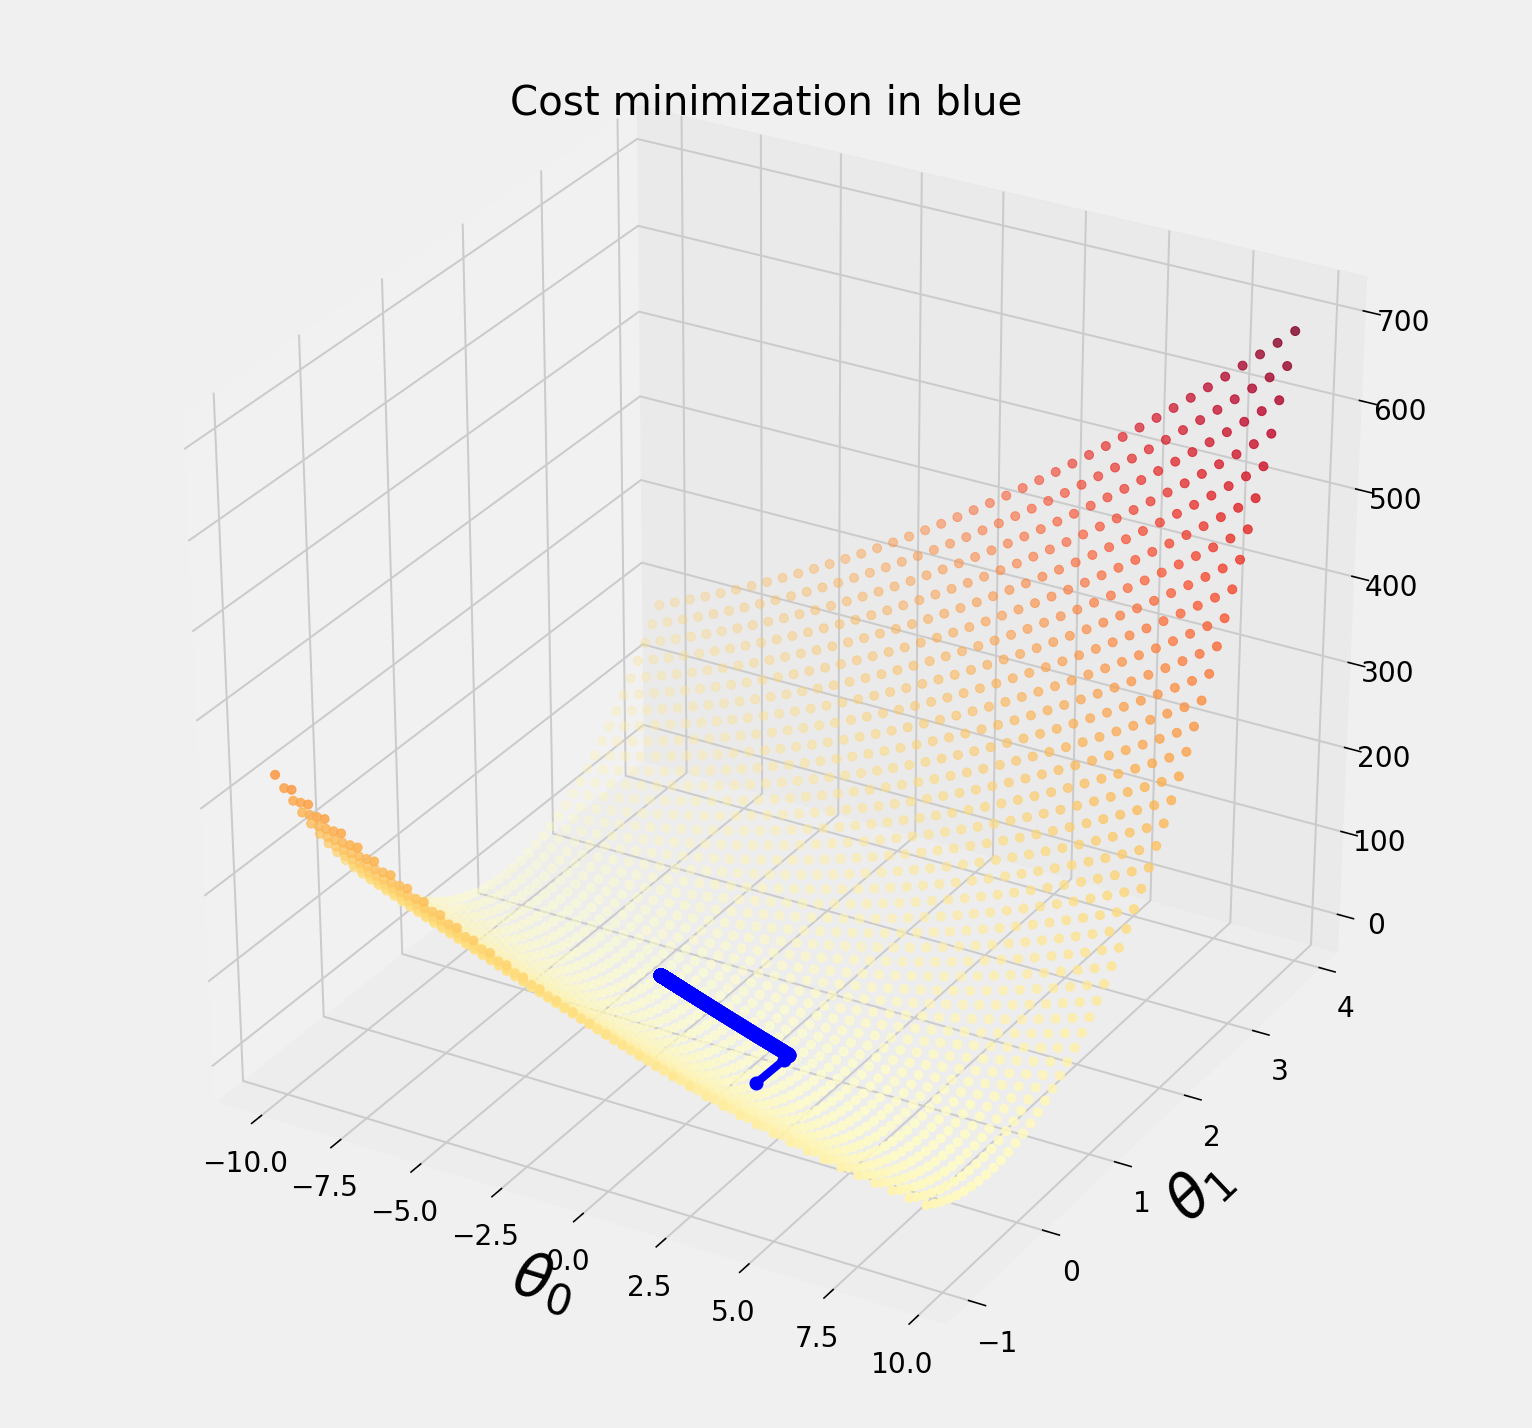

In [25]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10, 10, .5)
yvals = np.arange(-1, 4, .1)
myxs, myys, myzs = [], [], []

for i in xvals:
    for j in yvals:
        myxs.append(i)
        myys.append(j)
        myzs.append(computeCost(X, y, np.matrix([i, j])))
        
scat = ax.scatter(myxs, myys, myzs, c=np.abs(myzs), cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$', fontsize=30)
plt.ylabel(r'$\theta_1$', fontsize=30)
plt.title('Cost minimization in blue')
# print('%s, %s' % (theta_hist[0], J_hist[0]))
ax.plot3D([x[0] for x in theta_hist],[x[1] for x in theta_hist], [x[0] for x in J_hist], 'bo-')
plt.show()

In [115]:
path = os.getcwd() + '/data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names = ['HouseSize', 'Bedrooms', 'Price'])
data2.head(n=5)

,HouseSize,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [116]:
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)

In [121]:
def featureNormalize(X):
    stored_feature_means, stored_feature_stds = [], []
    Xnorm = X.copy()
    for icol in range(Xnorm.shape[1]):
        stored_feature_means.append(np.mean(Xnorm[:,icol]))
        stored_feature_stds.append(np.std(Xnorm[:,icol]))
        #Skip the first column
        # if not icol: continue
        #Faster to not recompute the mean and std again, just used stored values
        Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]
    return Xnorm

In [123]:
X2 = featureNormalize(X2)
#y2 = featureNormalize(y2)

matrix([[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0, -1],
        [ 1,  1],
        [ 0,  1],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  1],
        [ 0,  0],
        [ 0,  0],
        [ 4,  2],
        [ 0,  0],
        [ 0,  1],
        [ 0, -1],
        [ 0,  0],
        [ 0,  1],
        [ 1,  1],
        [ 0,  0],
        [ 0, -1],
        [ 0,  0],
        [ 0,  1],
        [ 2,  0],
        [-1,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0, -1],
        [-1, -2],
        [ 0,  1],
        [ 1,  0],
        [ 0,  1],
        [ 0,  0],
        [ 0,  0],
        [ 0,  1],
        [ 2,  1],
        [ 0,  1],
        [ 0, -1],
        [ 0,  0],
        [ 0,  1],
        [-1,  0],
        [-1, -1],
        [ 0,  1],
        [-1,  0]])

In [52]:
X2 = np.insert(X2, 0, 1, axis=1) # insert zero at column 0

In [55]:
# _arr = np.delete(np.squeeze(np.asarray(X2)), 1, 1) To delete a particular column from a numpy array
# X2 = np.matrix(_arr)
theta2 = np.matrix(np.array([0, 0, 0]))
J = computeCost(X2, y2, theta2);
J

0.22340425531914893